In [2]:
import pandas as pd
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ranksums

## Importing Data & Data Quality Assessment

In [3]:
df=pd.read_csv('takeHome.csv')

In [4]:
df.head()

,ltv,ttime,abt,tue
0,"{""n"":""250""}","{""n"":""1077572""}","{""n"":""31""}","{""n"":""38""}"
1,"{""n"":""49""}","{""n"":""60028""}","{""n"":""32""}","{""n"":""15""}"
2,"{""n"":""680""}","{""n"":""2018285""}","{""n"":""7""}","{""n"":""46""}"
3,"{""n"":""125""}","{""n"":""98142""}","{""n"":""11""}","{""n"":""15""}"
4,"{""n"":""450""}","{""n"":""115692""}","{""n"":""9""}","{""n"":""15""}"


In [5]:
df.tail()

,ltv,ttime,abt,tue
9994,"{""n"":""250""}","{""n"":""4002074""}","{""n"":""23""}","{""n"":""127""}"
9995,"{""n"":""250""}","{""n"":""2134787""}","{""n"":""28""}","{""n"":""53""}"
9996,"{""n"":""150""}","{""n"":""107426""}","{""n"":""53""}","{""n"":""15""}"
9997,"{""n"":""72""}","{""n"":""0""}","{""n"":""26""}","{""n"":""15""}"
9998,"{""n"":""175""}","{""n"":""381875""}","{""n"":""3""}","{""n"":""25""}"


In [6]:
df.describe()

,ltv,ttime,abt,tue
count,9998,9999,9999,9997
unique,739,8834,60,1116
top,"{""n"":""250""}","{""n"":""0""}","{""n"":""52""}","{""n"":""15""}"
freq,1568,1090,196,3098


In [7]:
print(df.isnull().sum(),'\n',df.isnull().mean()) 

ltv      1
ttime    0
abt      0
tue      2
dtype: int64 
 ltv      0.0001
ttime    0.0000
abt      0.0000
tue      0.0002
dtype: float64


In [8]:
print(df[df.isnull().any(axis=1)])

              ltv          ttime         abt         tue
267   {"n":"320"}  {"n":"48044"}  {"n":"60"}         NaN
1343  {"n":"200"}  {"n":"49990"}  {"n":"59"}         NaN
1797          NaN      {"n":"0"}  {"n":"12"}  {"n":"15"}


In [9]:
df.dropna(inplace=True)
print(df.isnull().sum())

ltv      0
ttime    0
abt      0
tue      0
dtype: int64


In [10]:
cols=df.columns

for col in cols:
    df[col]=df[col].apply(lambda string:string[6:])
    df[col]=df[col].apply(lambda string: string[:-2]) 

In [11]:
df.head()

,ltv,ttime,abt,tue
0,250,1077572,31,38
1,49,60028,32,15
2,680,2018285,7,46
3,125,98142,11,15
4,450,115692,9,15


In [12]:
df=df.apply(lambda x : pd.to_numeric(x))  
print(df.head())

     ltv    ttime  abt  tue
0  250.0  1077572   31   38
1   49.0    60028   32   15
2  680.0  2018285    7   46
3  125.0    98142   11   15
4  450.0   115692    9   15


In [13]:
df.head()

,ltv,ttime,abt,tue
0,250.0,1077572,31,38
1,49.0,60028,32,15
2,680.0,2018285,7,46
3,125.0,98142,11,15
4,450.0,115692,9,15


In [14]:
df.describe()

,ltv,ttime,abt,tue
count,9996.000000,9.996000e+03,9996.000000,9996.000000
mean,388.548219,1.455021e+07,30.284314,193.528311
std,417.700380,6.361143e+07,17.402454,551.032452
min,0.000000,0.000000e+00,1.000000,15.000000
25%,200.000000,1.148820e+05,15.000000,15.000000
50%,250.000000,8.482985e+05,30.000000,33.000000
75%,450.000000,4.450682e+06,45.000000,118.250000
max,8481.000000,1.735807e+09,60.000000,10563.000000


In [15]:
econs = pd.read_csv('econs.txt', delimiter= '\t', index_col=False)

In [16]:
econs.head()

,cumGXP,cumPXP,econ,lvl,cumTime,cumUnits
0,500.0,0,Controls,1,0.1,0
1,1500.0,200,Controls,2,0.1,20
2,3500.0,600,Controls,3,0.2,60
3,6500.0,1200,Controls,4,0.3,120
4,11000.0,2000,Controls,5,0.5,200


In [17]:
econs.tail()

,cumGXP,cumPXP,econ,lvl,cumTime,cumUnits
135,1627550.0,169895,Econ3,36,180.84,1595
136,1743050.0,177895,Econ3,37,193.67,1595
137,1863050.0,185895,Econ3,38,207.01,1595
138,1987550.0,193895,Econ3,39,220.84,1595
139,2116550.0,201895,Econ3,40,235.17,1595


In [18]:
econs.describe()

,cumGXP,cumPXP,lvl,cumTime,cumUnits
count,1.400000e+02,140.000000,140.000000,140.000000,140.000000
mean,7.633306e+05,62854.321429,19.071429,81.093071,1003.664286
std,9.474260e+05,64019.149510,11.495788,106.626688,625.653093
min,5.000000e+02,0.000000,1.000000,0.060000,0.000000
25%,5.630000e+04,6800.000000,9.000000,4.720000,413.500000
50%,3.848588e+05,36197.500000,18.000000,31.930000,1094.500000
75%,1.134578e+06,113895.000000,29.000000,125.090000,1666.000000
max,4.450650e+06,201895.000000,40.000000,494.520000,2071.000000


In [19]:
econs.count()

cumGXP      140
cumPXP      140
econ        140
lvl         140
cumTime     140
cumUnits    140
dtype: int64

In [20]:
econs.isna().mean()

cumGXP      0.0
cumPXP      0.0
econ        0.0
lvl         0.0
cumTime     0.0
cumUnits    0.0
dtype: float64

## Assigning AB groups

In [21]:
dicts = {}

for i in range(1,7):
        dicts[i] = 'Controls'
for i in range(55,61):
        dicts[i] = 'Controls'
for i in range(7,15):
        dicts[i] = 'Econ1'
for i in range(19,35):
        dicts[i] = 'Econ1'
for i in range(15,17):
        dicts[i] = 'Econ2'
for i in range(35,45):
        dicts[i] = 'Econ2'
for i in range(17,19):
        dicts[i] = 'Econ3'
for i in range(45,55):
        dicts[i] = 'Econ3'

In [22]:
df['econ']=df['abt'].replace(dicts)

In [23]:
df.to_csv(r'cleaned_df.csv',index = False)

-----Data Cleaning Finished--------------------

# Data Exploration

In [24]:
df=pd.read_csv('cleaned_df.csv')
econs = pd.read_csv('econs.txt', delimiter= '\t', index_col=False)


In [25]:
df.shape

(9996, 5)

In [26]:
df.groupby('econ').size()

econ
Controls    2018
Econ1       3916
Econ2       2053
Econ3       2009
dtype: int64

In [27]:
df.groupby('econ').size()/len(df)*100

econ
Controls    20.188075
Econ1       39.175670
Econ2       20.538215
Econ3       20.098039
dtype: float64

In [28]:
econs.groupby('econ').size()

econ
Controls    20
Econ1       40
Econ2       40
Econ3       40
dtype: int64

## Summary Statistcs 
1. df grouped by econ

In [29]:
df.groupby('econ').size()

econ
Controls    2018
Econ1       3916
Econ2       2053
Econ3       2009
dtype: int64

Econ1 doubled the sample size (39%) compared to the other groups. In fact, all group have a different sample size.

In [30]:
df.groupby('econ')['ltv'].describe()

,count,mean,std,min,25%,50%,75%,max
econ,,,,,,,,
Controls,2018.0,399.096135,435.936904,12.0,200.0,250.0,450.0,3955.0
Econ1,3916.0,382.758938,392.564889,12.0,200.0,250.0,450.0,5055.0
Econ2,2053.0,387.160253,441.699037,0.0,180.0,250.0,430.0,8481.0
Econ3,2009.0,390.656048,421.361600,32.0,200.0,250.0,450.0,4980.0


In [31]:
test=df.loc[df['econ'].isin( ["Controls","Econ1"])].copy()

In [32]:
test.head()

,ltv,ttime,abt,tue,econ
0,250.0,1077572,31,38,Econ1
1,49.0,60028,32,15,Econ1
2,680.0,2018285,7,46,Econ1
3,125.0,98142,11,15,Econ1
4,450.0,115692,9,15,Econ1


In [33]:
df.loc[df['econ'].isin(["Controls"]),"ltv"].mean()


399.09613478691773

In [34]:
df.loc[df['econ'].isin(["Econ1"]),"ltv"].mean()

382.75893769152196

In [35]:
(df.loc[df['econ'].isin(["Controls"]),"ltv"]>300).mean()

0.35777998017839446

In [36]:
(df.loc[df['econ'].isin(["Econ1"]),"ltv"]>300).mean()

0.35137895812053116

In [37]:
logcontrol=np.log(df.loc[df['econ'].isin(["Controls"]),"ltv"]+1)
logcontrol.mean()

5.668429974309078

In [38]:
logecon1=np.log(df.loc[df['econ'].isin(["Econ1"]),"ltv"]+1)
logecon1.mean()

5.64610848250782

LTV: All groups' standard deviation is greater than mean,indicating data are extremly spread out.Mean values are not representing the trend of each group.

In [39]:
df.groupby('econ')['ttime'].describe()

,count,mean,std,min,25%,50%,75%,max
econ,,,,,,,,
Controls,2018.0,1.871728e+07,8.805781e+07,0.0,121960.25,942656.0,5199670.25,1.735807e+09
Econ1,3916.0,1.307065e+07,5.321491e+07,0.0,107984.50,819698.0,4447216.50,1.020310e+09
Econ2,2053.0,1.415490e+07,5.964837e+07,0.0,111986.00,810668.0,4659234.00,1.343444e+09
Econ3,2009.0,1.365245e+07,5.632640e+07,0.0,122092.00,881778.0,3873406.00,1.198358e+09


TTIME: Same for the TTIME. Data are widely spread out. Coltrol group has the highest meand and standard deviation, compared to control groups. Econ1 has the lowest standard deviation (5.321491e+07), indicating data are more clustered around the mean.

In [40]:
df.groupby('econ')['tue'].describe()

,count,mean,std,min,25%,50%,75%,max
econ,,,,,,,,
Controls,2018.0,350.299306,904.592992,15.0,15.0,60.0,241.00,10563.0
Econ1,3916.0,166.136108,429.531092,15.0,15.0,31.0,110.25,6028.0
Econ2,2053.0,144.070141,414.621042,15.0,15.0,25.0,92.00,7670.0
Econ3,2009.0,139.990045,350.000058,15.0,15.0,30.0,88.00,3161.0


TUE: Data are widely spread out. Econ3 has the lowest mean and standard deviation, indicating data are more clustered around the mean.

2. Econs data 

In [41]:
econs.groupby('econ').size()

econ
Controls    20
Econ1       40
Econ2       40
Econ3       40
dtype: int64

In [42]:
econs.groupby('econ').size()/len(econs)

econ
Controls    0.142857
Econ1       0.285714
Econ2       0.285714
Econ3       0.285714
dtype: float64

The size of groups are very small. If the desired confidence level for the test is 95% and the minimum acceptable margin of error is 5%, the control group will need to be larger.( 20% for the 100 participant for example)

In [43]:
econs.groupby('econ')['cumGXP'].describe()

,count,mean,std,min,25%,50%,75%,max
econ,,,,,,,,
Controls,20.0,278946.805,3.468693e+05,500.0,16062.5,120518.75,430676.875,1129220.0
Econ1,40.0,626861.250,6.473918e+05,500.0,68675.0,389300.00,1051175.000,2116550.0
Econ2,40.0,1278461.250,1.368086e+06,750.0,112087.5,737025.00,2166337.500,4450650.0
Econ3,40.0,626861.250,6.473918e+05,500.0,68675.0,389300.00,1051175.000,2116550.0


Econ2 has the highest average CumGXP (1278461) and the highest standard deviation (1.368086e+06). Econ1 & Econ3 have the equal average CumGXP (626861), still higher than the control group's average CumGXP.

In [44]:
econs.groupby('econ')['cumPXP'].describe()

,count,mean,std,min,25%,50%,75%,max
econ,,,,,,,,
Controls,20.0,13300.000,12216.382443,0.0,2750.0,10000.0,21750.0,38000.0
Econ1,40.0,71113.375,65993.469484,0.0,9145.0,53895.0,123895.0,201895.0
Econ2,40.0,71113.375,65993.469484,0.0,9145.0,53895.0,123895.0,201895.0
Econ3,40.0,71113.375,65993.469484,0.0,9145.0,53895.0,123895.0,201895.0


All 3 testing groups have the average CumPXP (71113) and the standard deviation (65993). All testing groups have higher mean against the control group.

In [45]:
econs.groupby('econ')['cumTime'].describe()

,count,mean,std,min,25%,50%,75%,max
econ,,,,,,,,
Controls,20.0,4.93500,4.947330,0.10,0.6500,3.60,7.8750,14.70
Econ1,40.0,69.65325,71.931713,0.06,7.6325,43.26,116.7975,235.17
Econ2,40.0,142.05175,152.009311,0.08,12.4575,81.89,240.7050,494.52
Econ3,40.0,69.65325,71.931713,0.06,7.6325,43.26,116.7975,235.17


Econ2 has the highest average CumTime (142) and the highest standard deviation (152). Econ1 & Econ3 have the equal average CumTime (69), 14 times higher than the control group's average CumTime.

In [46]:
econs.groupby('econ')['cumUnits'].describe()

,count,mean,std,min,25%,50%,75%,max
econ,,,,,,,,
Controls,20.0,897.750,686.952145,0.0,275.0,848.0,1448.25,2071.0
Econ1,40.0,1073.375,629.481744,0.0,506.5,1278.0,1666.00,1666.0
Econ2,40.0,1073.375,629.481744,0.0,506.5,1278.0,1666.00,1666.0
Econ3,40.0,917.200,591.061505,0.0,380.0,958.5,1595.00,1595.0


Econ3 has the lowest average CumUnits (917) and the lowest standard deviation (591). 

In [47]:
econs.groupby('econ')['lvl'].describe()

,count,mean,std,min,25%,50%,75%,max
econ,,,,,,,,
Controls,20.0,10.5,5.916080,1.0,5.75,10.5,15.25,20.0
Econ1,40.0,20.5,11.690452,1.0,10.75,20.5,30.25,40.0
Econ2,40.0,20.5,11.690452,1.0,10.75,20.5,30.25,40.0
Econ3,40.0,20.5,11.690452,1.0,10.75,20.5,30.25,40.0


All 3 testing groups have the same average Level (20). Levels range from 1 to 40. 

## Takeaway from Summay Statistics analysis: 
- Data in the main table are extremy spread out. I need to identify outliers and decide how to handle extreme values.
- Econs data is very small but shows a clear trend for each testing group. (Econ3 seems to be our optimal group because it has the lowest CumUnits, but all testing groups have the equal average CumPXP, ~5x higher than the benchmark.)
- Next step: Visualizing data distribution for each group & Further statistical analysis

## Visualizing distribution

1. pairplot: A pairplot plot a pairwise relationships in a dataset. The pairplot function creates a grid of Axes such that each variable in data will by shared in the y-axis across a single row and in the x-axis across a single column.

<Figure size 432x288 with 0 Axes>

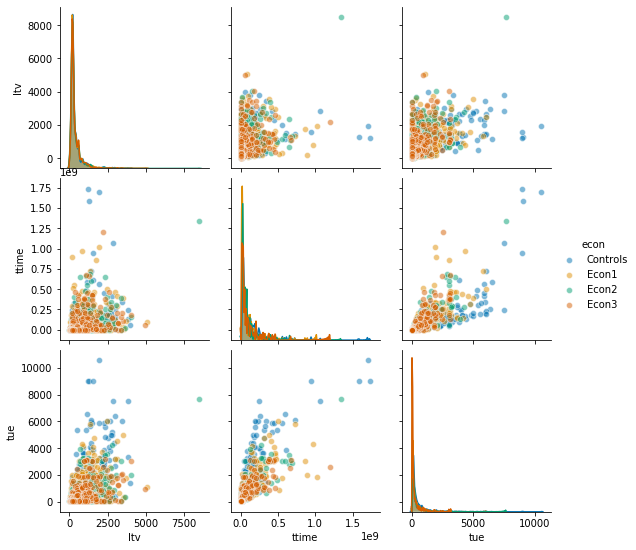

In [48]:
sub=df.drop('abt',axis=1)
order=["Controls","Econ1","Econ2","Econ3"]

plt.figure()
#sns.set(style="ticks", color_codes=True)
sns.pairplot(sub,hue='econ',palette='colorblind', plot_kws={'alpha':0.5},hue_order=order)
plt.savefig('pairplotall',dpi=300);   
plt.show()

<Figure size 432x288 with 0 Axes>

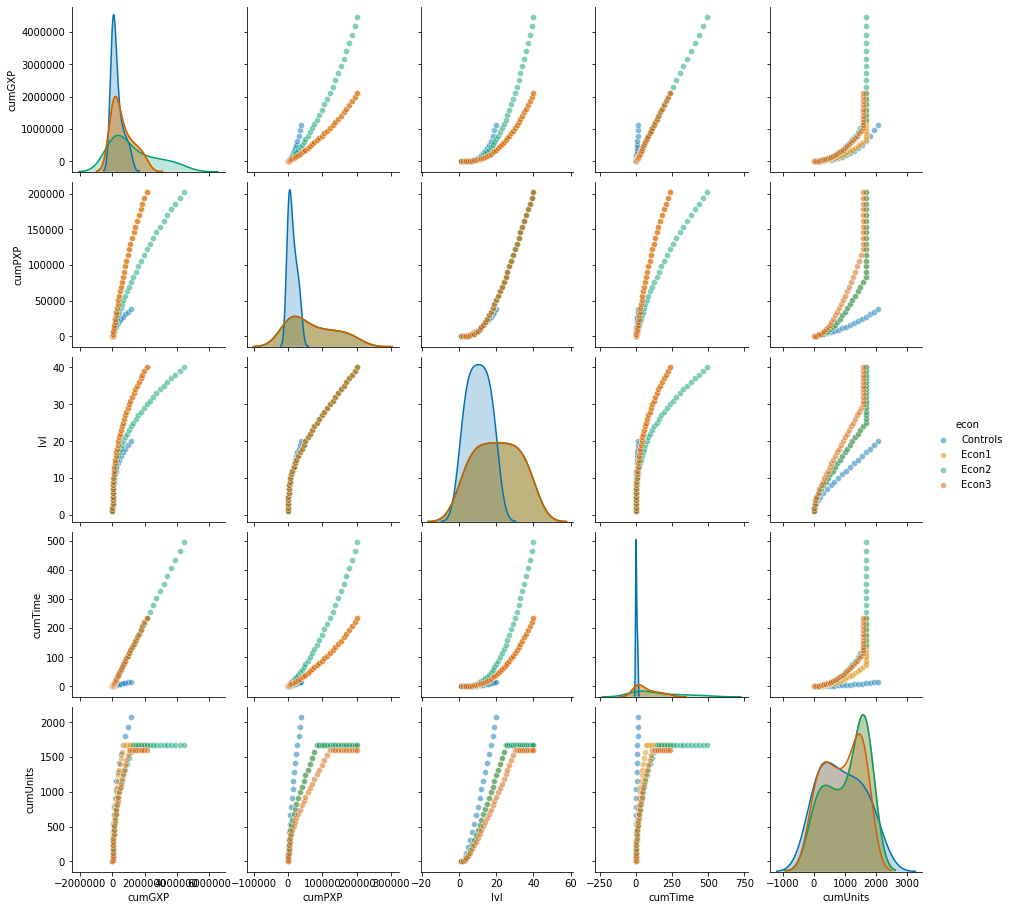

In [49]:
plt.figure()
#sns.set(style="ticks", color_codes=True)
sns.pairplot(econs,hue='econ',palette='colorblind', plot_kws={'alpha':0.5},hue_order=order)
plt.savefig('pairploteconstable',dpi=300);   
plt.show()

<Figure size 432x288 with 0 Axes>

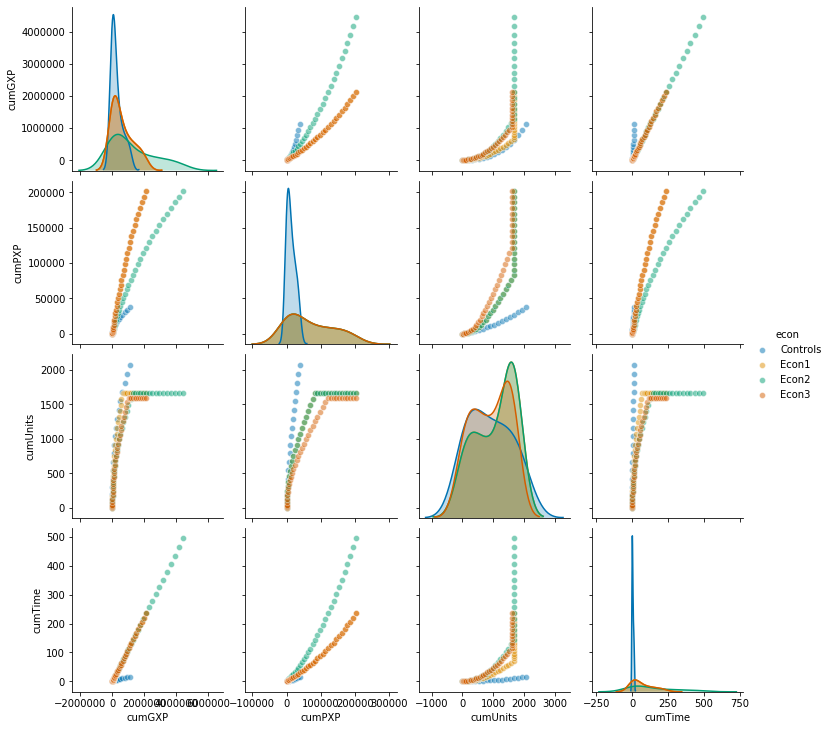

In [50]:
rela=econs[['cumGXP','cumPXP','cumUnits','cumTime','econ']]
plt.figure()
#sns.set(style="ticks", color_codes=True)
sns.pairplot(rela, hue='econ',palette='colorblind', plot_kws={'alpha':0.5},hue_order=order)
plt.savefig('cumGXP&cumPXPpairplot',dpi=300);   
plt.show()

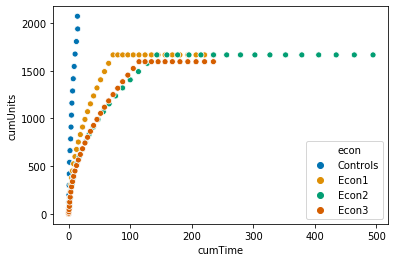

In [51]:

sns.scatterplot(data=rela, x='cumTime', y="cumUnits", hue="econ",palette='colorblind',hue_order=order)

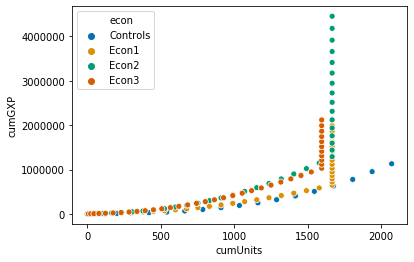

In [52]:
sns.scatterplot(data=rela, x="cumUnits", y="cumGXP", hue="econ",palette='colorblind',hue_order=order)

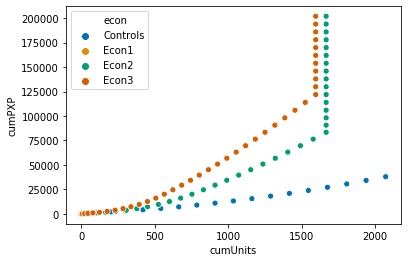

In [53]:
sns.scatterplot(data=rela, x="cumUnits", y="cumPXP", hue="econ",palette='colorblind',hue_order=order)

In [54]:
control=sub[sub['econ']=='Controls']
econ1=sub[sub['econ']=='Econ1']
econ2=sub[sub['econ']=='Econ2']
econ3=sub[sub['econ']=='Econ3']

## Individual:Control

<Figure size 432x288 with 0 Axes>

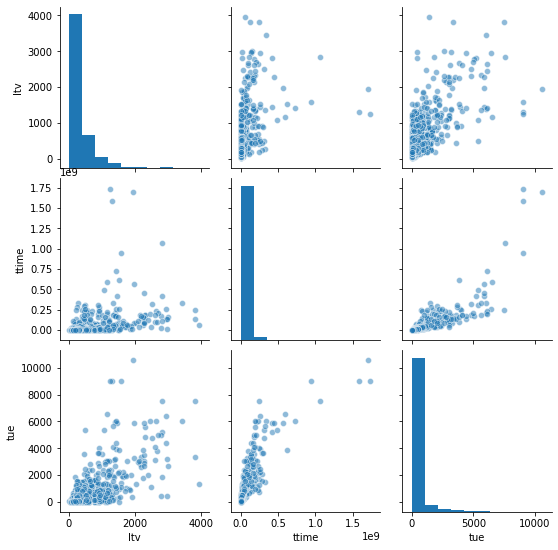

In [55]:
plt.figure()
#sns.set(style="ticks", color_codes=True)
sns.pairplot(control, plot_kws={'alpha':0.5})
plt.savefig('pairplotcontrol',dpi=300);   
plt.show()

## Individual: Econ1

<Figure size 432x288 with 0 Axes>

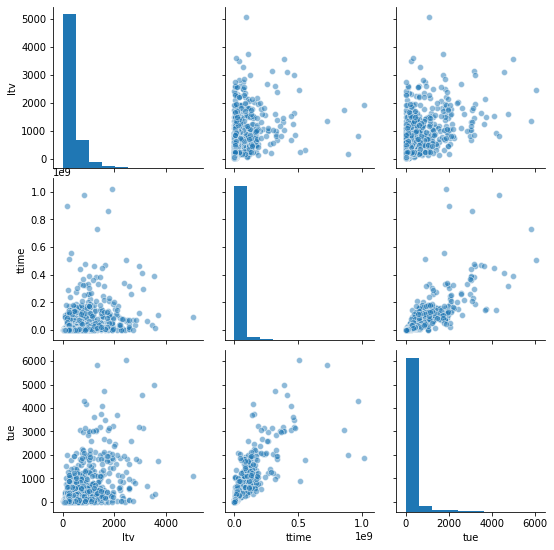

In [56]:
plt.figure()
#sns.set(style="ticks", color_codes=True)
sns.pairplot(econ1, plot_kws={'alpha':0.5})
plt.savefig('pairplotecon1',dpi=300);   
plt.show()

## Individual: Econ2

<Figure size 432x288 with 0 Axes>

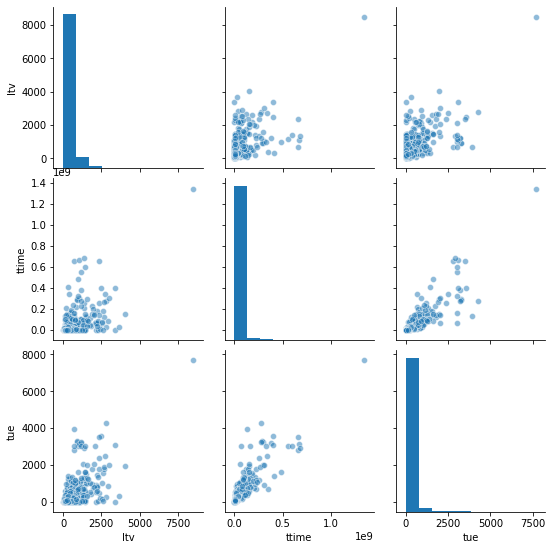

In [57]:
plt.figure()
#sns.set(style="ticks", color_codes=True)
sns.pairplot(econ2, plot_kws={'alpha':0.5})
plt.savefig('pairploecon2',dpi=300);   
plt.show()

## Individual:Econ3

<Figure size 432x288 with 0 Axes>

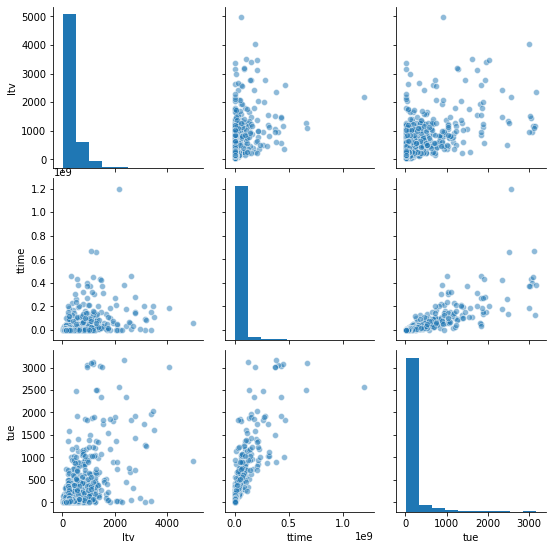

In [58]:
plt.figure()
#sns.set(style="ticks", color_codes=True)
sns.pairplot(econ3, plot_kws={'alpha':0.5})
plt.savefig('pairplotecon3',dpi=300);   
plt.show()

2. Distplot: The distplot represents the univariate distribution of data i.e. data distribution of a variable against the density distribution.

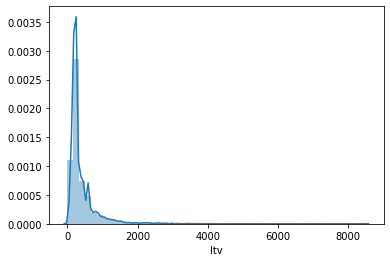

In [59]:
plt.figure()
sns.distplot(df.ltv,rug=False, hist=True)
plt.show()

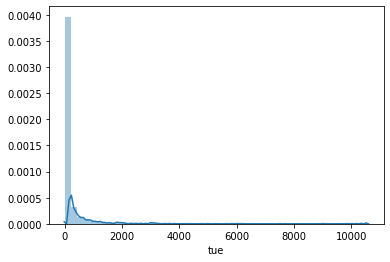

In [60]:
plt.figure()
sns.distplot(df.tue,rug=False)
plt.show()

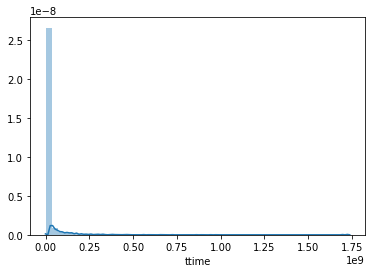

In [61]:
plt.figure()
sns.distplot(df.ttime,rug=False)
plt.show()

3. boxplot

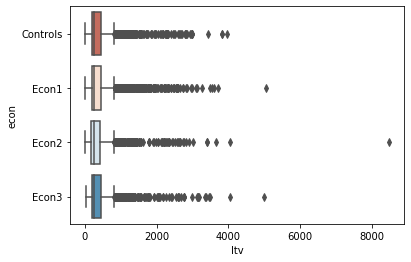

In [62]:
plt.figure()
#sns.set(style="ticks", color_codes=True)
sns.boxplot(x='ltv', y='econ',data=sub, orient='h',palette="RdBu", order=["Controls","Econ1","Econ2","Econ3"])
plt.savefig('boxplotltv',dpi=300);   
plt.show()

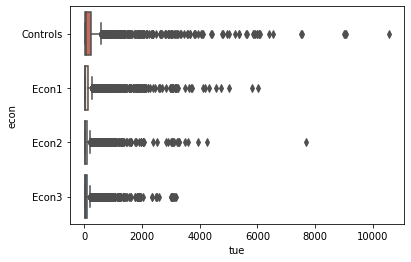

In [63]:
plt.figure()
order=["Controls","Econ1","Econ2","Econ3"]
#sns.set(style="ticks", color_codes=True)
sns.boxplot(x='tue', y='econ',data=sub, orient='h',palette="RdBu",order=order)
plt.savefig('boxplottue',dpi=300);   
plt.show()

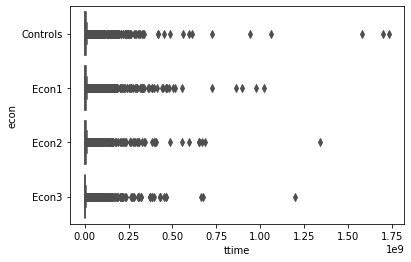

In [64]:
plt.figure()
#sns.set(style="ticks", color_codes=True)
sns.boxplot(x='ttime', y='econ',data=sub, orient='h',palette="RdBu",order=order)
plt.savefig('boxplotttime',dpi=300);   
plt.show()

## Takeaway from the visualization: 
- All features have right skewed distribution. Outliers with extremly high values, that do not fall near any other data points. It could represent unusual cases, data entry errors, or different measure unit of data. Whatever the case may be, it cuases problems for the evaluation of the tests because the mean values are affected by extreme values. 
- Strategy: Rank based Statistical analysis for daata do not have a Gaussian distribution

# Hypothesis test
- The Wilcoxon signed-rank test is the non-parametric univariate test which is an alternative to the dependent t-test
- This is the recommended test for the data that violates the assumption of normality.
- It is used to test if there is a statistically significant difference in different groups of users.

In [65]:
control=df[df['econ']=='Controls']
econ1=df[df['econ']=='Econ1']
econ2=df[df['econ']=='Econ2']
econ3=df[df['econ']=='Econ3']


In [66]:
c=econs[econs['econ']=='Controls']
e1=econs[econs['econ']=='Econ1']
e2=econs[econs['econ']=='Econ2']
e3=econs[econs['econ']=='Econ3']

## Anova
- H0 (null hypothesis):all the population means are equal
- H1 (null hypothesis): at least one population mean is different from the rest

In [67]:
# LTV
f,p=stats.f_oneway(control['ltv'], econ1['ltv'], econ2['ltv'],econ3['ltv'])
print(p)

0.5493653940666126


- p-value is 0.54
- Since the p-value is not less than 0.05, fail to reject the null hypothesis. 
- There is NO statistical evidence to say that there is a difference in mean LTV among 4 groups

In [68]:
# TUE
f,p=stats.f_oneway(control['tue'], econ1['tue'], econ2['tue'],econ3['tue'])
print(p)

2.0795954749816646e-45


- p-value is 2.0795954749816646e-45
- Since the p-value is less than 0.05, we reject the null hypothesis. 
- There is statistical evidence to say that there is a difference in mean TUE among 4 groups
- Further analysis will follow to identify which group performed better

In [69]:
# TTIME
f,p=stats.f_oneway(control['ttime'], econ1['ttime'], econ2['ttime'],econ3['ttime'])
print(p)

0.010393190826182392


- p-value is 0.010393190826182392
- Since the p-value is less than 0.05, we reject the null hypothesis.
- There is statistical evidence to say that there is a difference in mean TTIME among 4 groups
- Further analysis will follow to identify which group performed better

In [70]:
# checking econs data
f,p=stats.f_oneway(c['cumPXP'], e1['cumPXP'], e2['cumPXP'],e3['cumPXP'])
print(p)

0.002331699099280821


In [71]:
#checking econs data
f,p=stats.f_oneway(c['cumGXP'], e1['cumGXP'], e2['cumGXP'],e3['cumGXP'])
print(p)

0.00019256120910480595


## QQplot: TUE
Controls

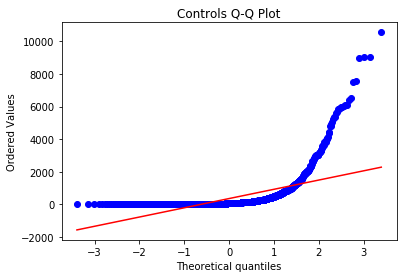

In [72]:
stats.probplot(control['tue'], dist="norm", plot=plt)
plt.title("Controls Q-Q Plot")
plt.savefig("control_QQ")

Econ1

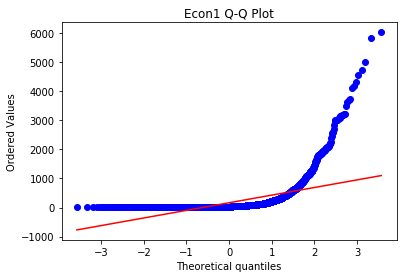

In [73]:
stats.probplot(econ1['tue'], dist="norm", plot=plt)
plt.title("Econ1 Q-Q Plot")
plt.savefig("econ1QQ")

Econ2

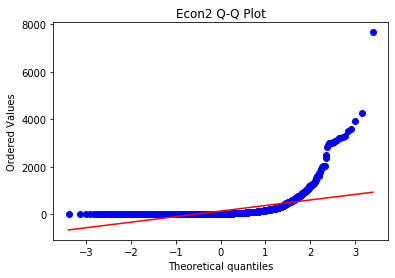

In [74]:
stats.probplot(econ2['tue'], dist="norm", plot=plt)
plt.title("Econ2 Q-Q Plot")
plt.savefig("econ2QQ")

Econ3

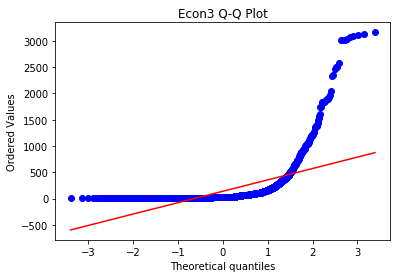

In [75]:
stats.probplot(econ3['tue'], dist="norm", plot=plt)
plt.title("Econ3 Q-Q Plot")
plt.savefig("econ3QQ")

## Wilcoxon Rank-Sum: TUE
- For two unequal-sized samples, used Wilcoxon Rank-Sum
- The p-value of less than 0.05 indicates that this test rejects the hypothesis at the 5% significance level
- Null hypothesis (H0): The mean TUE is equal between the two groups
- Alternative hypothesis (HA): Values in one sample are more likely to be larger than the values in the other sample.

In [76]:
# Control vs Econ1 (Different Sample Size)
stats.ranksums(control['tue'], econ1['tue'])

RanksumsResult(statistic=9.195480029574945, pvalue=3.7332397097912035e-20)

- Two-sided p-value is 3.7332397097912035e-20
- Since the p-value is less than 0.05, we reject the null hypothesis
- We do have sufficient evidence to say that the true mean of TUE is different between the two groups

In [77]:
# Control vs Econ2 (Different Sample Size)
#stats.ranksums(control['tue'], econ2['tue'])
stats.ranksums(control['tue'], econ2['tue'])

RanksumsResult(statistic=11.059082884302478, pvalue=1.9811280904128378e-28)

- Two-sided p-value is 1.9811280904128378e-28
- Since the p-value is less than 0.05, we reject the null hypothesis
- We do have sufficient evidence to say that the true mean of TUE is different between the two groups

In [78]:
# Control vs Econ3 (Different Sample Size)
#stats.ranksums(control['tue'], econ3['tue'])
stats.ranksums(control['tue'], econ3['tue'])

RanksumsResult(statistic=9.67883672815275, pvalue=3.709121400949643e-22)

- Two-sided p-value is 3.709121400949643e-22
- Since the p-value is less than 0.05, we reject the null hypothesis
- We do have sufficient evidence to say that the true mean of TUE is different between the two groups

In [79]:
# Econ1 vs Econ2 (Different Sample Size)
stats.ranksums(econ1['tue'], econ2['tue'])

RanksumsResult(statistic=3.981951526852624, pvalue=6.835172186281442e-05)

- Two-sided p-value is 0.00006835172186281442
- Since the p-value is less than 0.05, we reject the null hypothesis
- We do have statistical evidence to say that the true mean of TUE is different between the two groups

In [80]:
# Econ1 vs Econ3 (Different Sample Size)
stats.ranksums(econ1['tue'], econ3['tue'])

RanksumsResult(statistic=2.2064352935823948, pvalue=0.027353536147624327)

- Two-sided p-value is 0.027353536147624327
- Since the p-value is less than 0.05, we reject the null hypothesis
- We do have statistical evidence to say that the true mean of TUE is different between the two groups

In [81]:
# Econ2 vs Econ3 (Different Sample Size)
stats.ranksums(econ2['tue'], econ3['tue'])

RanksumsResult(statistic=-1.6348762456074564, pvalue=0.10207499307130342)

- Two-sided p-value is 0.10207499307130342
- Since the p-value is Not less than 0.05, we fail to reject the null hypothesis
- We do have NO statistical evidence to say that the true mean of TUE is different between the two groups

---Results: Econ2 & Econ3 have lower mean of TUE against Control group and Econ1---

## QQplot : TTIME
Controls

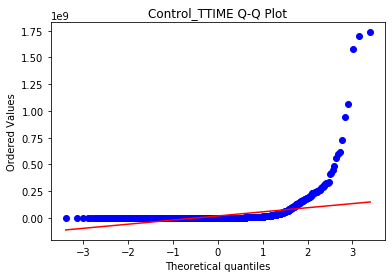

In [82]:
stats.probplot(control['ttime'], dist="norm", plot=plt)
plt.title("Control_TTIME Q-Q Plot")
plt.savefig("controlttimeQQ")

Econ1

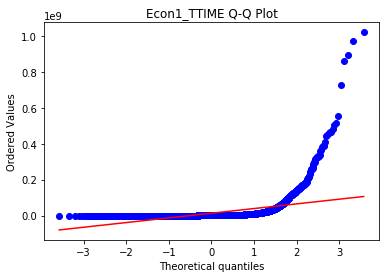

In [83]:
stats.probplot(econ1['ttime'], dist="norm", plot=plt)
plt.title("Econ1_TTIME Q-Q Plot")
plt.savefig("econ1_ttimeQQ")

Econ2

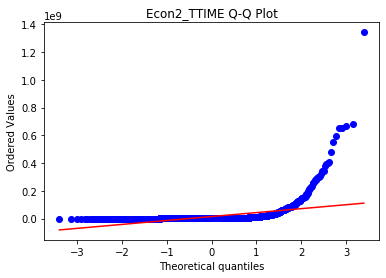

In [84]:
stats.probplot(econ2['ttime'], dist="norm", plot=plt)
plt.title("Econ2_TTIME Q-Q Plot")
plt.savefig("econ2_ttimeQQ")

Econ3

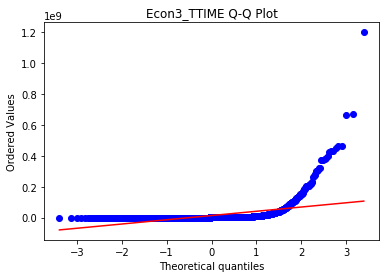

In [85]:
stats.probplot(econ3['ttime'], dist="norm", plot=plt)
plt.title("Econ3_TTIME Q-Q Plot")
plt.savefig("econ3_ttimeQQ")

In [86]:
# Control vs Econ1 (Different Sample Size)
stats.ranksums(control['ttime'], econ1['ttime'])

RanksumsResult(statistic=1.7755026206108229, pvalue=0.0758149332323386)

In [87]:
# Control vs Econ2 (Different Sample Size)
stats.ranksums(control['ttime'], econ2['ttime'])

RanksumsResult(statistic=1.4000695903260867, pvalue=0.16149248031635355)

In [88]:
# Control vs Econ3 (Different Sample Size)
stats.ranksums(control['ttime'], econ3['ttime'])

RanksumsResult(statistic=1.457237594826781, pvalue=0.14505080631135464)

In [89]:
# econ1 vs Econ2 (Different Sample Size)
stats.ranksums(econ1['ttime'], econ2['ttime'])

RanksumsResult(statistic=-0.1794112031681361, pvalue=0.8576148352547169)

In [90]:
# econ1 vs Econ3 (Different Sample Size)
stats.ranksums(econ1['ttime'], econ3['ttime'])

RanksumsResult(statistic=-0.11298618508203039, pvalue=0.9100415077824457)

In [91]:
# econ2 vs Econ3 (Different Sample Size)
stats.ranksums(econ2['ttime'], econ3['ttime'])

RanksumsResult(statistic=0.03621938142434576, pvalue=0.9711074319861158)

---Results: Contradictory results between Anova and wilcoxon. No group differs significantly from the anothers. ---

## Corss Validation: Wilcoxon Rank-Sum: LTV

In [92]:
# control vs Econ1 (Different Sample Size)
print("control vs econ1:",stats.ranksums(control['ltv'], econ1['ltv']))
print("control vs econ2:",stats.ranksums(control['ltv'], econ2['ltv']))
print("control vs econ3:",stats.ranksums(control['ltv'], econ3['ltv']))
print("econ1 vs econ2:",stats.ranksums(econ1['ltv'], econ2['ltv']))
print("econ1 vs econ3:",stats.ranksums(econ1['ltv'], econ3['ltv']))
print("econ2 vs econ3:",stats.ranksums(econ2['ltv'], econ3['ltv']))

control vs econ1: RanksumsResult(statistic=0.6341823436997082, pvalue=0.525961828930145)
control vs econ2: RanksumsResult(statistic=1.0806232903331217, pvalue=0.27986471804647894)
control vs econ3: RanksumsResult(statistic=0.28971532627771684, pvalue=0.7720340302824751)
econ1 vs econ2: RanksumsResult(statistic=0.6150247352423939, pvalue=0.5385383853025354)
econ1 vs econ3: RanksumsResult(statistic=-0.3111872969745974, pvalue=0.7556582395048572)
econ2 vs econ3: RanksumsResult(statistic=-0.801241757375516, pvalue=0.4229917013432639)


## Takeaway from hypothesis test: 
- In terms of LTV, we did not find significant differences between group means. 
- In terms of TUE, the testing detected mean difference in Econ2 & Econ3 against both Control and Econ1 groups. 
- In terms of TTIME, it appeared non-significant while the Anova is significant. All testing groups did not have mean difference against the benchmark, nor the others.

## How the TTIME & TUE are related to GXP & PXP?
- Rank correlation coefficient assess statistical associations based on the ranks of the data
- Values close to 1 indicate strong agreement, values close to -1 indicate strong disagreement

In [93]:
##calculate correlation coefficients for all pairwise combinations
sub=df.drop('abt',axis=1)

In [94]:
sub.corr()

,ltv,ttime,tue
ltv,1.000000,0.434548,0.580597
ttime,0.434548,1.000000,0.811910
tue,0.580597,0.811910,1.000000


In [95]:
corr1=sub.corr(method='kendall')    
corr1

,ltv,ttime,tue
ltv,1.000000,0.292650,0.332124
ttime,0.292650,1.000000,0.807744
tue,0.332124,0.807744,1.000000


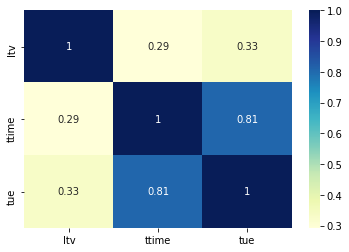

In [96]:
sns.heatmap(corr1, 
           xticklabels=corr1.columns.values, 
           yticklabels=corr1.columns.values, 
           cmap="YlGnBu",
          annot=True)

In [97]:
corr2=econs.corr(method='kendall')
corr2

,cumGXP,cumPXP,lvl,cumTime,cumUnits
cumGXP,1.000000,0.886626,0.897276,0.924165,0.843328
cumPXP,0.886626,1.000000,0.989512,0.888068,0.790172
lvl,0.897276,0.989512,1.000000,0.890402,0.792848
cumTime,0.924165,0.888068,0.890402,1.000000,0.764936
cumUnits,0.843328,0.790172,0.792848,0.764936,1.000000


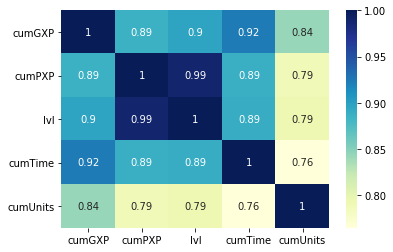

In [98]:
sns.heatmap(corr2, 
           xticklabels=corr2.columns.values, 
           yticklabels=corr2.columns.values, 
           cmap="YlGnBu",
          annot=True)

## Takeaway from Rank Correlation Coefficient:
- There is a strong association between TTIME and TUE (0.81)

- CumTime has the strongest association with CumGXP (0.92), and then CumPXP(0.89) > Lvl(0.89) > CumUnits (0.76)
- Lvl has the strongest association with CumPXP (0.99, which is almost a perfect association) and CumGXP (0.9) > CumTime(0.89) > CumUnits (0.76)
- CumPXP has the strongest association with lvl(0.99)> CumGXP (0.89) and CumTime (0.89) > CumUnits(0.79)
- CumUnits has the strongest association with CumGXP (0.84)> CumPXP (0.79) and Lvl(0.79)> CumTime(0.76)
- It seems like there is a cap on CumUnits for each testing group, and that explains why CumUnits do not have the strongest association with CumTime.
- CumUnits have the strongest association with CumGXP> CumPXP & Lvl > CumTime

In [99]:
df.groupby('econ')['tue'].describe()

,count,mean,std,min,25%,50%,75%,max
econ,,,,,,,,
Controls,2018.0,350.299306,904.592992,15.0,15.0,60.0,241.00,10563.0
Econ1,3916.0,166.136108,429.531092,15.0,15.0,31.0,110.25,6028.0
Econ2,2053.0,144.070141,414.621042,15.0,15.0,25.0,92.00,7670.0
Econ3,2009.0,139.990045,350.000058,15.0,15.0,30.0,88.00,3161.0


In [100]:
df.groupby('econ')['ttime'].describe()

,count,mean,std,min,25%,50%,75%,max
econ,,,,,,,,
Controls,2018.0,1.871728e+07,8.805781e+07,0.0,121960.25,942656.0,5199670.25,1.735807e+09
Econ1,3916.0,1.307065e+07,5.321491e+07,0.0,107984.50,819698.0,4447216.50,1.020310e+09
Econ2,2053.0,1.415490e+07,5.964837e+07,0.0,111986.00,810668.0,4659234.00,1.343444e+09
Econ3,2009.0,1.365245e+07,5.632640e+07,0.0,122092.00,881778.0,3873406.00,1.198358e+09


# Conclustion:
- None of testing lead to a statistically meaningful LTV increase. 
- Econ2 & Econ3 have lower mean TUE (58% and 60% respectively) with 95% confidence level.
- Since TTIME has a strong association with TUE, it is important to test which adjustment can lower TTIME. But, None of testing groups showed statistically meanigful results on TTIME decrease.

- In Econs data, both CumTime and CumUnits have the strongest association with CumGXP.
- In Econs data, Econ3 has the loweest cap for CumUnits than other groups. 
- Also, Econ3 reached the highest CumPXP level than other groups, while maintaining moderate CumGXP level. We can do more testings if we get the same outcomes with takeHome data.


# Suggestions:
- We might want to test the same things multiple times until we have enough data to make a solid decision.
- Changing just one variable ensures that we know what had an impact on the desired outcome and we can measure one thing at a time efficiently.
- The proportion of test groups will indicate the statistical significance or room for misleading results; we may want to uniform the groups' size.